In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('cities_r2.csv')


In [3]:
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [4]:
print("Missing values:\n",data.isnull().sum())

Missing values:
 name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64


In [5]:
data = data.dropna(subset=['total_graduates'])

In [6]:
scaler = StandardScaler()
data['total_graduates_scaled'] = scaler.fit_transform(data[['total_graduates']])

In [8]:
sse=[]
k_range = range(1,11)
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state = 42)
    kmeans.fit(data[['total_graduates_scaled']])
    sse.append(kmeans.inertia_)

C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

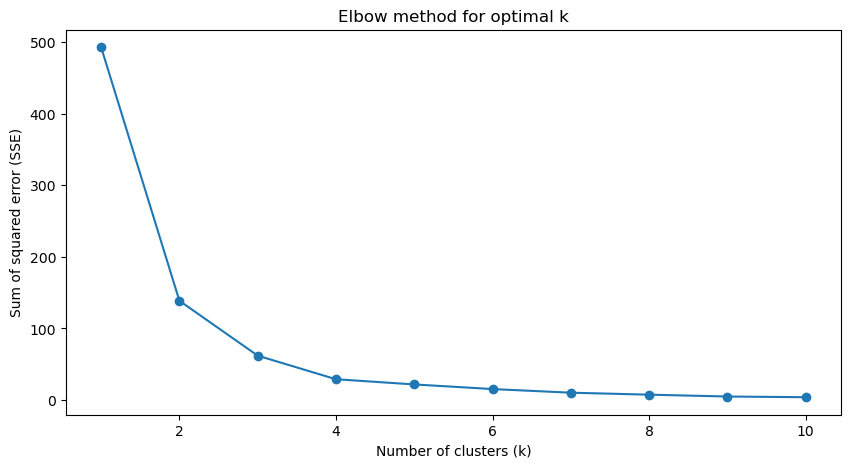

In [9]:
plt.figure(figsize=(10,5))
plt.plot(k_range,sse,marker='o')
plt.title("Elbow method for optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of squared error (SSE)")
plt.show()

In [10]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k,random_state=42)
data['cluster'] = kmeans.fit_predict(data[['total_graduates_scaled']])

C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ishan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


IndexError: index 1 is out of bounds for axis 1 with size 1

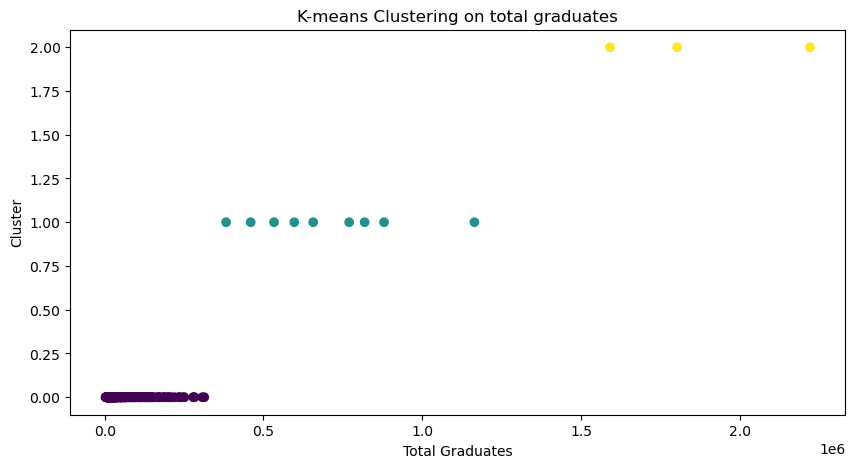

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(data['total_graduates'], data['cluster'], c=data['cluster'], cmap='viridis', label='Data points')
plt.title("K-means Clustering on total graduates")
plt.xlabel("Total Graduates")
plt.ylabel("Cluster")

# Ensure centers include both dimensions and apply inverse transformation if necessary.
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.legend()
plt.show()


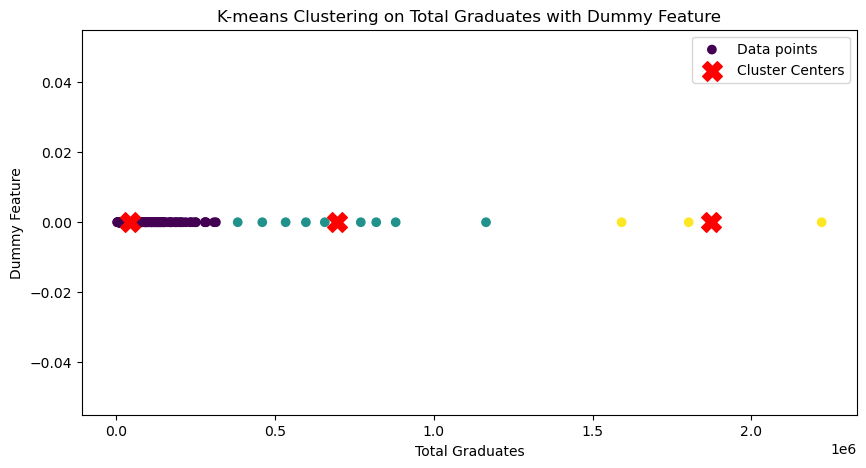

In [15]:
import numpy as np

# Create a dummy feature for 2D plotting
data['dummy_feature'] = np.zeros(len(data))  # This will make all data points align on y=0

plt.figure(figsize=(10, 5))

# Scatter plot for data points
plt.scatter(data['total_graduates'], data['dummy_feature'], c=data['cluster'], cmap='viridis', label='Data points')

# Plot the cluster centers with dummy y-values
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers, np.zeros(len(centers)), c='red', marker='X', s=200, label='Cluster Centers')

# Labels and title
plt.title("K-means Clustering on Total Graduates with Dummy Feature")
plt.xlabel("Total Graduates")
plt.ylabel("Dummy Feature")

plt.legend()
plt.show()
